### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="viridis")

### Import Dataset

In [42]:
df = pd.read_csv('examples/energibridge-profiling/experiments/experiment3.0/all_run_tables_combined.csv')
columns_to_remove = ['sampling', '__run_id', '__done']
df.drop(columns_to_remove, axis=1, inplace=True)

df["experiment_name"] = df["experiment_name"].astype(str).str.replace("code_func", "code_function")

algorithms = [
    "dijkstra",
    "edit_distance",
    "fibonacci",
    "floyd",
    "knapsack",
    "levenshtein_distance",
    "longest_common_subsequence",
    "matrix_chain_multiplication",
    "matrix_chain_order",
    "rod_cutting",
]

def extract_base_algo(name):
    name_lower = name.lower()
    for algo in algorithms:
        if algo in name_lower:
            return algo
    return "unknown"

df["base_algo"] = df["experiment_name"].apply(extract_base_algo)

methods = [
    "code_function",
    "code_native",
    "native_function",
    "code",
    "function",
    "multi",
    "native",
    "network",
    "object",
    "other",
    "origin",
    "mixed",
]

def extract_methods(name):
    name_lower = name.lower()
    for algo in methods:
        if algo in name_lower:
            return algo
    return "unknown"

df["optimize_method"] = df["experiment_name"].apply(extract_methods)
df["optimize_method"] = df["optimize_method"].astype(str).str.replace("_", ",")

df.head()

,experiment_name,repetition,execution_time_ms,cpu_usage_percent,memory_usage_mb,cpu_energy_j,base_algo,optimize_method
0,matrix_chain_order_object_experiment,1,5665.349,7.375,2945.177,63.446,matrix_chain_order,object
1,matrix_chain_order_object_experiment,2,5615.964,6.757,2920.825,62.751,matrix_chain_order,object
2,matrix_chain_order_object_experiment,3,5631.394,6.704,2909.778,65.999,matrix_chain_order,object
3,matrix_chain_order_object_experiment,4,5613.072,6.707,2893.873,65.122,matrix_chain_order,object
4,matrix_chain_order_object_experiment,5,5623.146,6.590,2891.908,62.471,matrix_chain_order,object


In [43]:
df["base_algo"].unique()

array(['matrix_chain_order', 'dijkstra', 'longest_common_subsequence',
       'floyd', 'matrix_chain_multiplication', 'fibonacci', 'knapsack',
       'edit_distance', 'levenshtein_distance', 'rod_cutting'],
      dtype=object)

In [44]:
df["optimize_method"].unique()

array(['object', 'multi', 'function', 'native,function', 'mixed', 'other',
       'native', 'origin', 'code,function', 'code', 'network',
       'code,native'], dtype=object)

### Data Analysis

In [5]:
df = pd.read_csv("cleaned_experiment_results.csv")


In [6]:
   # 计算平均运行时间（秒）
avg_time_sec = df["execution_time_ms"].mean() / 1000
print("平均运行时间（秒）:", avg_time_sec)


平均运行时间（秒）: 4.585732883333333


In [48]:
metrics = ["execution_time_ms", "cpu_usage_percent", "memory_usage_mb", "cpu_energy_j"]

summary = (
    df.groupby(["base_algo", "optimize_method"])[metrics]
      .agg(["mean", "median", "std"])
      .round(3)
)

display(summary)


execution_time_ms                     \
                                         mean    median      std   
base_algo   optimize_method                                        
dijkstra    code                       71.256    70.872    1.286   
            function                   55.942    55.668    2.259   
            mixed                      45.861    45.406    1.155   
            multi                    9101.647  9059.356  150.026   
            native                   1654.616  1661.440   17.325   
...                                       ...       ...      ...   
rod_cutting mixed                      65.299    65.273    0.358   
            native                     64.848    64.480    0.884   
            object                   6288.450  6238.478  102.135   
            origin                   3710.304  3696.462   42.272   
            other                    1313.051  1310.753   28.679   

                            cpu_usage_percent                memory_usage_mb  \
                                         mean  median    std            mean   
base_algo   optimize_method                                                    
dijkstra    code                        6.895   7.148  1.084        2840.003   
            function                    5.512   5.882  0.983        2843.955   
            mixed                       6.042   6.290  0.903        2837.460   
            multi                       7.283   7.212  0.327        2829.471   
            native                     11.647  10.962  1.639        2894.089   
...                                       ...     ...    ...             ...   
rod_cutting mixed                      18.048  18.098  0.850        3000.586   
            native                     20.726  18.540  4.943        3003.394   
            object                      7.012   6.940  0.178        2931.141   
            origin                      6.930   6.911  0.218        2910.290   
            other                      14.897  13.581  2.931        2942.898   

                                              cpu_energy_j                 
                               median     std         mean  median    std  
base_algo   optimize_method                                                
dijkstra    code             2841.152   5.080        2.322   2.344  0.139  
            function         2843.116  13.375        1.685   1.594  0.222  
            mixed            2836.168   6.703        1.600   1.577  0.155  
            multi            2829.756   5.410       86.496  85.853  2.160  
            native           2894.106   7.850       40.400  39.508  2.499  
...                               ...     ...          ...     ...    ...  
rod_cutting mixed            3001.207  28.935       10.019   9.959  0.341  
            native           3001.601  26.404       10.219  10.136  0.468  
            object           2923.122  23.854       75.830  76.118  2.446  
            origin           2908.430  10.482       43.676  43.251  1.277  
            other            2941.882   6.711       15.408  15.004  0.924  

[84 rows x 12 columns]

In [49]:
summary_reset = summary.reset_index()
summary_reset.columns = ['_'.join(col).strip('_') for col in summary_reset.columns.values]
display(summary_reset.head())


,base_algo,optimize_method,execution_time_ms_mean,execution_time_ms_median,execution_time_ms_std,cpu_usage_percent_mean,cpu_usage_percent_median,cpu_usage_percent_std,memory_usage_mb_mean,memory_usage_mb_median,memory_usage_mb_std,cpu_energy_j_mean,cpu_energy_j_median,cpu_energy_j_std
0,dijkstra,code,71.256,70.872,1.286,6.895,7.148,1.084,2840.003,2841.152,5.080,2.322,2.344,0.139
1,dijkstra,function,55.942,55.668,2.259,5.512,5.882,0.983,2843.955,2843.116,13.375,1.685,1.594,0.222
2,dijkstra,mixed,45.861,45.406,1.155,6.042,6.290,0.903,2837.460,2836.168,6.703,1.600,1.577,0.155
3,dijkstra,multi,9101.647,9059.356,150.026,7.283,7.212,0.327,2829.471,2829.756,5.410,86.496,85.853,2.160
4,dijkstra,native,1654.616,1661.440,17.325,11.647,10.962,1.639,2894.089,2894.106,7.850,40.400,39.508,2.499


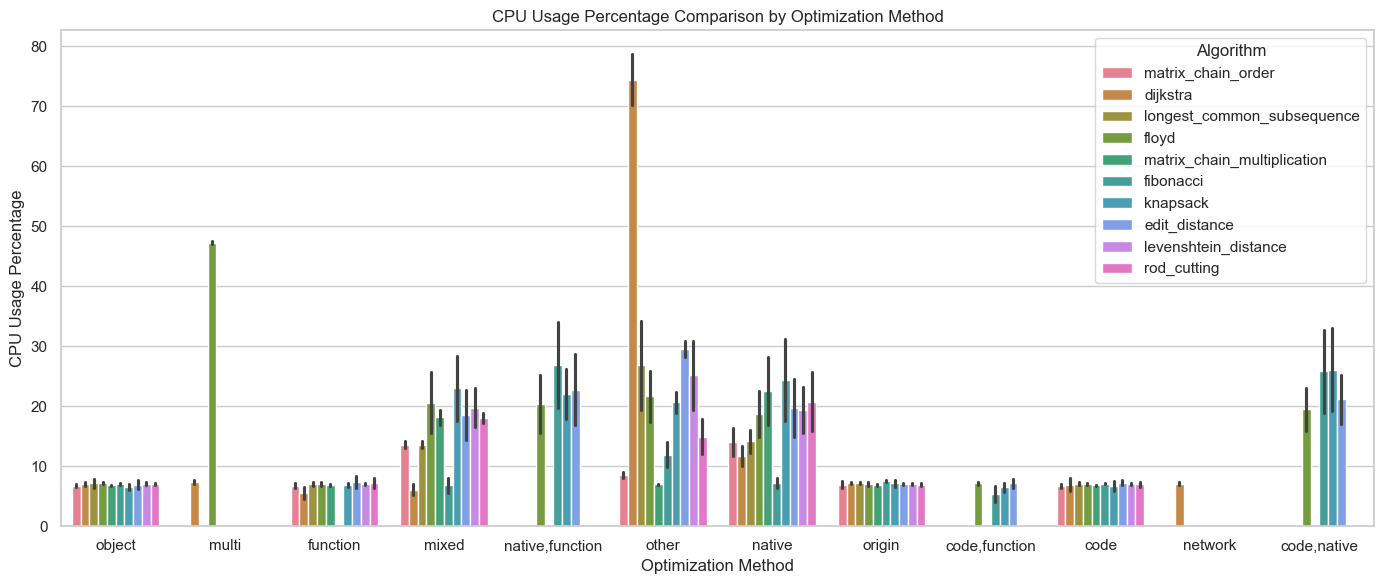

In [50]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="optimize_method",
    y="cpu_usage_percent",
    hue="base_algo",
    estimator=np.mean,
    errorbar="sd",
)
plt.title("CPU Usage Percentage Comparison by Optimization Method")
plt.ylabel("CPU Usage Percentage")
plt.xlabel("Optimization Method")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()


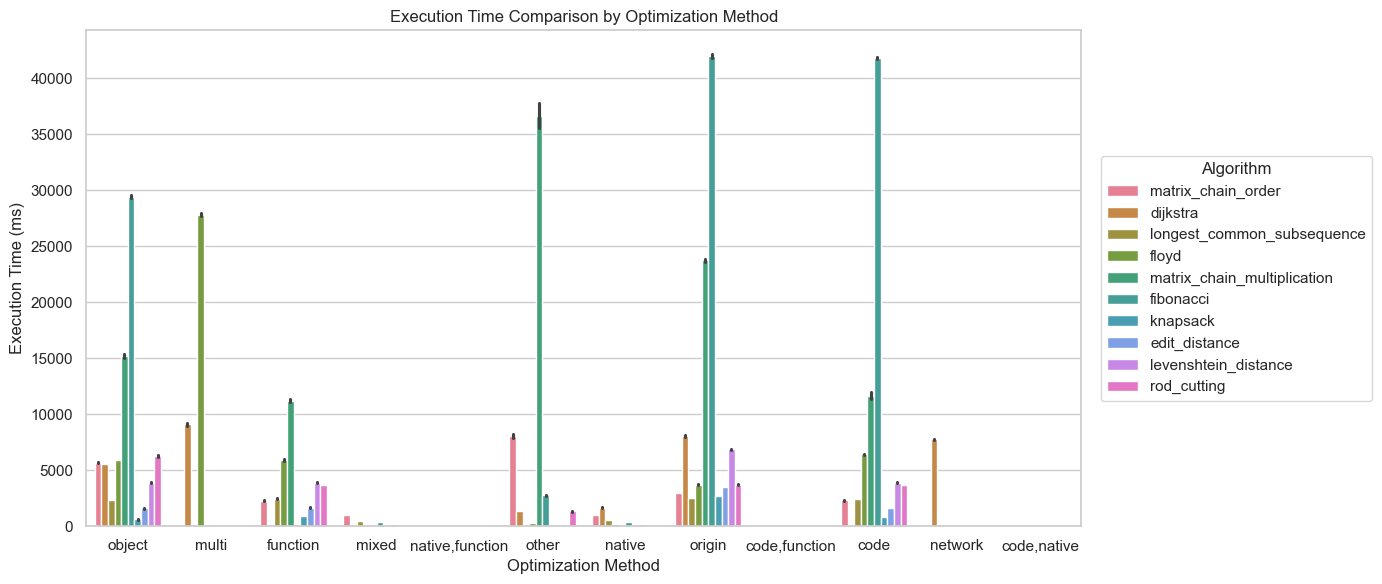

In [62]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="optimize_method",
    y="execution_time_ms",
    hue="base_algo",
    estimator=np.mean,
    errorbar="sd",
)
plt.title("Execution Time Comparison by Optimization Method")
plt.ylabel("Execution Time (ms)")
plt.xlabel("Optimization Method")
plt.legend(
    title="Algorithm",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0.
)
plt.tight_layout()
plt.show()


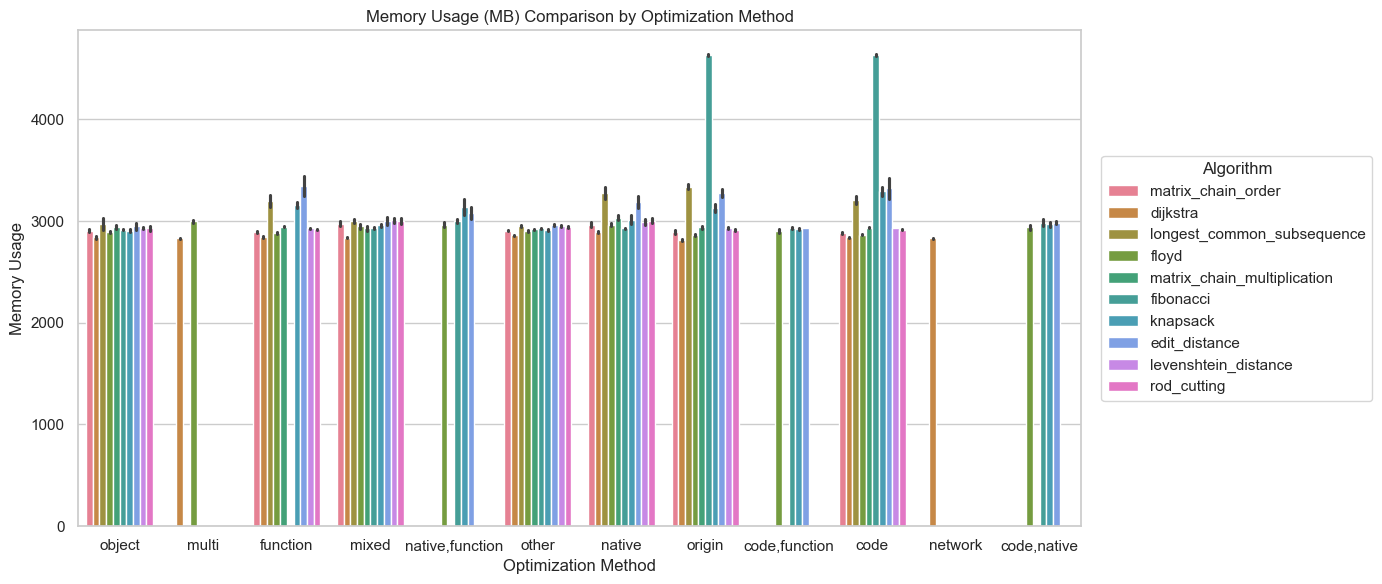

In [63]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="optimize_method",
    y="memory_usage_mb",
    hue="base_algo",
    estimator=np.mean,
    errorbar="sd",
)
plt.title("Memory Usage (MB) Comparison by Optimization Method")
plt.ylabel("Memory Usage")
plt.xlabel("Optimization Method")
plt.legend(
    title="Algorithm",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0.
)
plt.tight_layout()
plt.show()


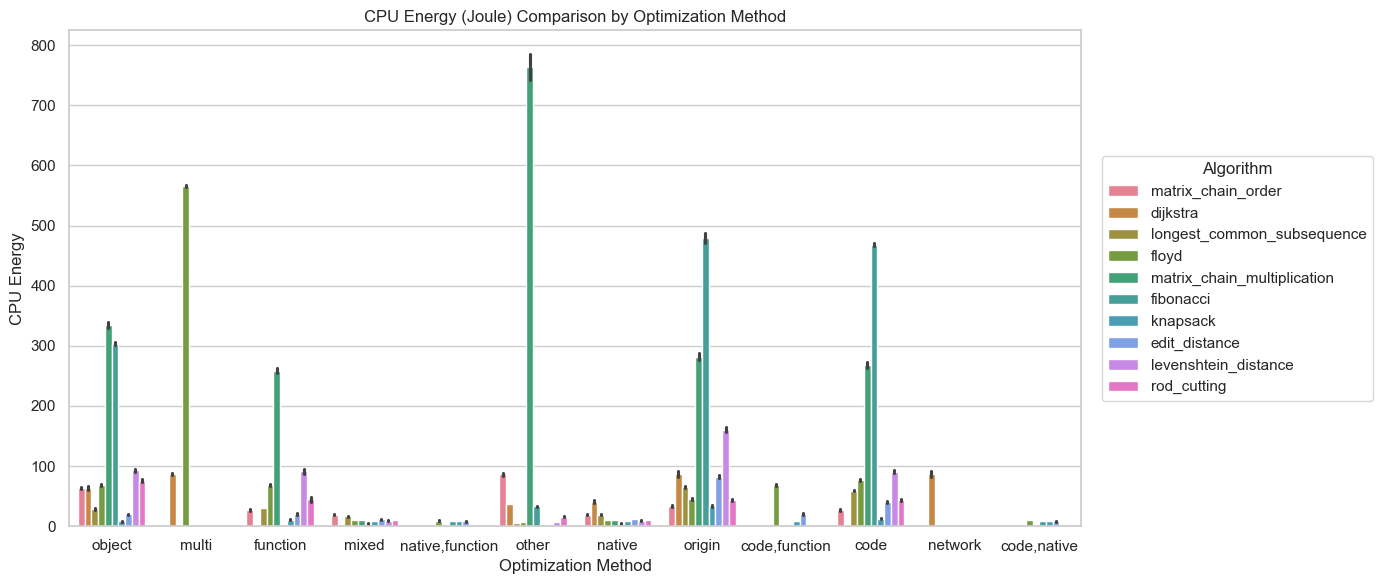

In [68]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="optimize_method",
    y="cpu_energy_j",
    hue="base_algo",
    estimator=np.mean,
    errorbar="sd",
)
plt.title("CPU Energy (Joule) Comparison by Optimization Method")
plt.ylabel("CPU Energy")
plt.xlabel("Optimization Method")
plt.legend(
    title="Algorithm",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0.
)
plt.tight_layout()
plt.show()


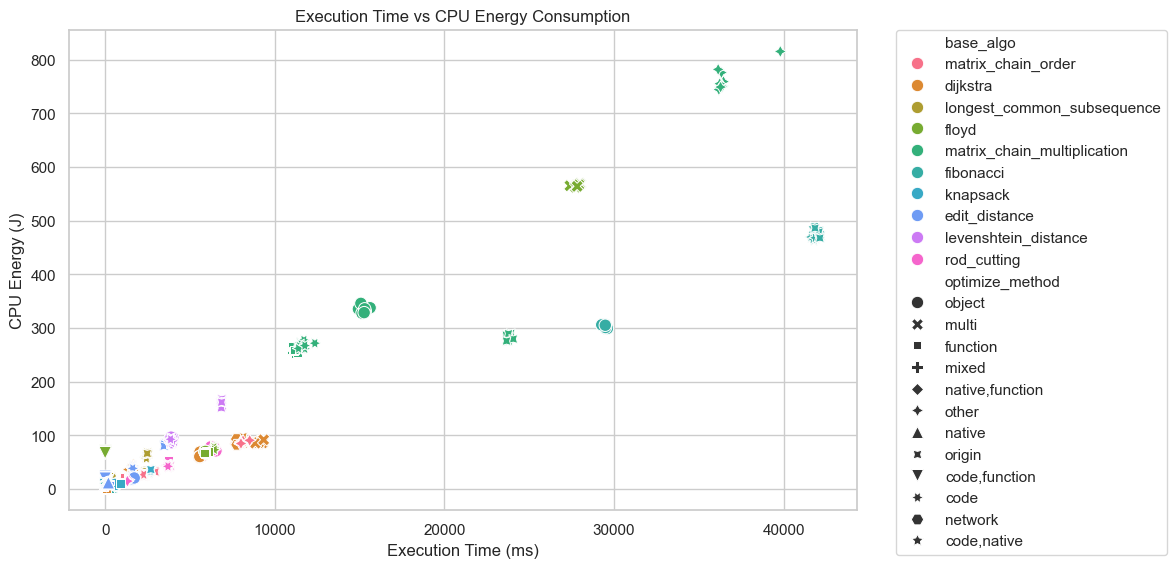

In [69]:
plt.figure(figsize=(12,6))  # wider figure
sns.scatterplot(
    data=df,
    x="execution_time_ms",
    y="cpu_energy_j",
    hue="base_algo",
    style="optimize_method",
    s=80
)

plt.title("Execution Time vs CPU Energy Consumption")
plt.xlabel("Execution Time (ms)")
plt.ylabel("CPU Energy (J)")

# Move legend outside the plot on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # prevent clipping
plt.show()


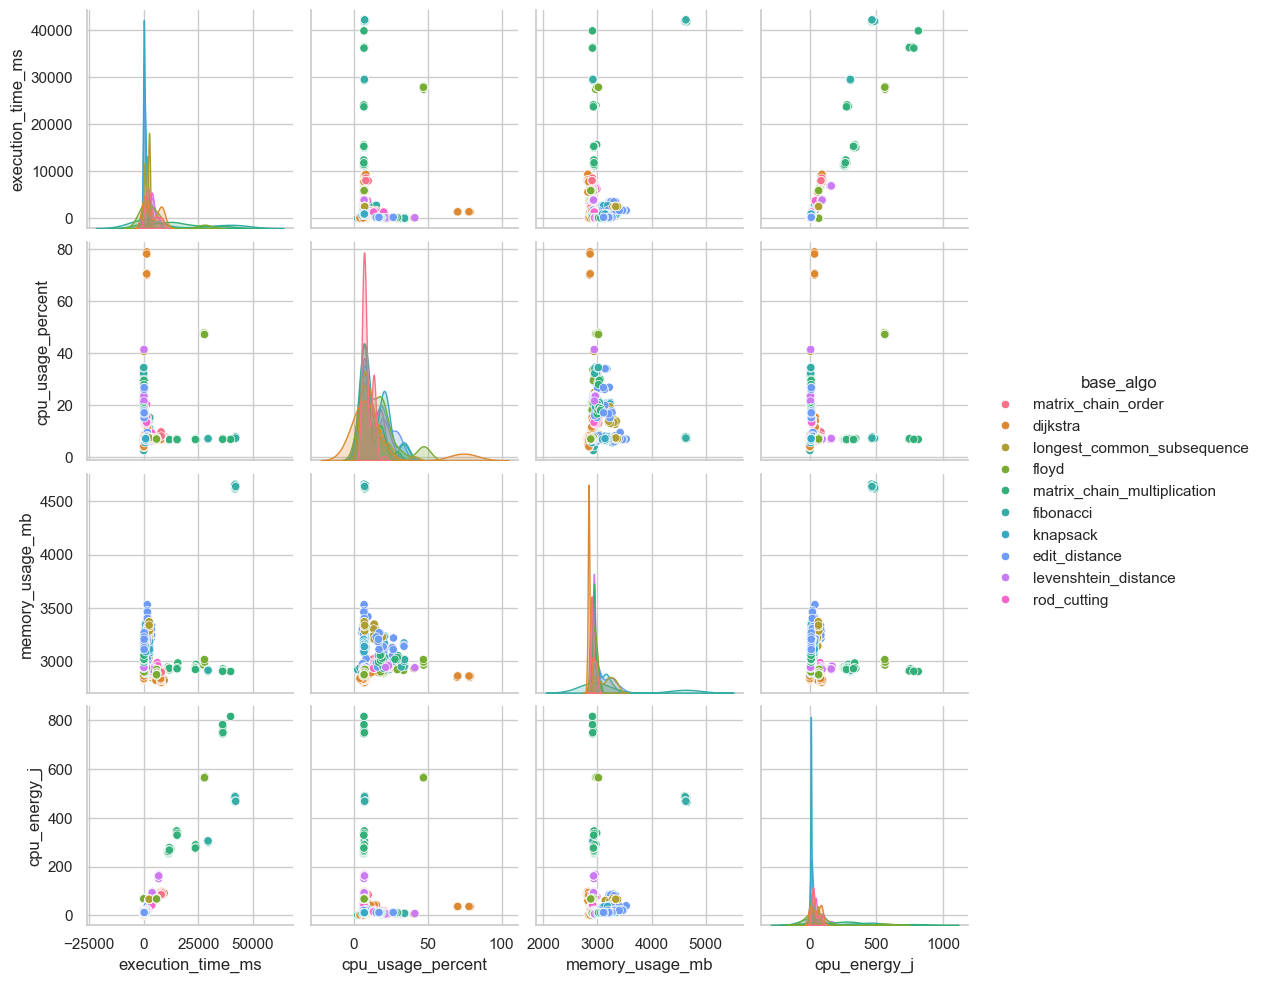

In [70]:
sns.pairplot(df, vars=["execution_time_ms", "cpu_usage_percent", "memory_usage_mb", "cpu_energy_j"], hue="base_algo")
plt.show()


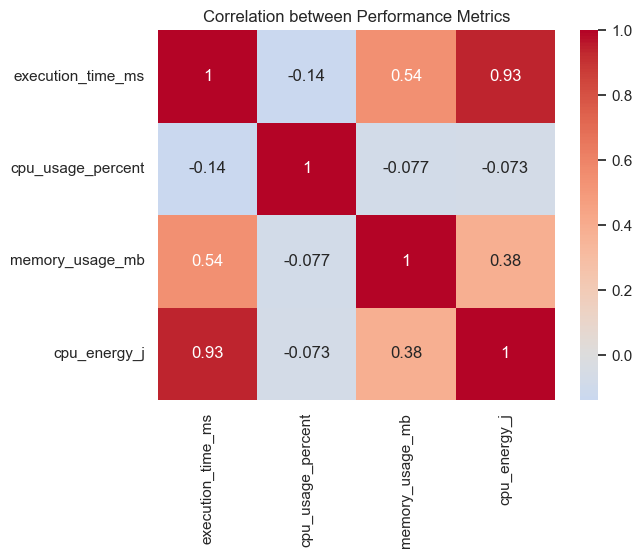

In [71]:
corr = df[["execution_time_ms","cpu_usage_percent","memory_usage_mb","cpu_energy_j"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Performance Metrics")
plt.show()


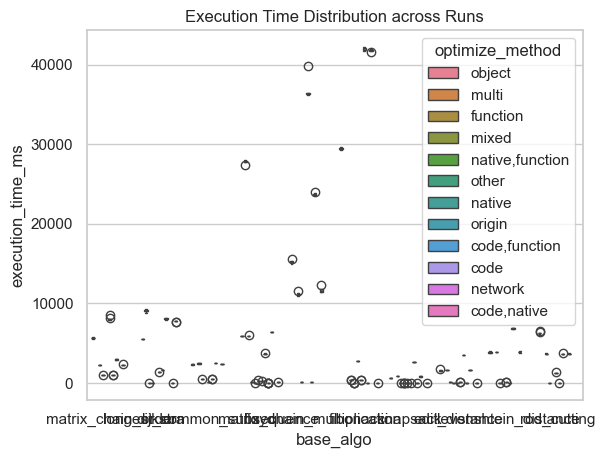

In [72]:
sns.boxplot(data=df, x="base_algo", y="execution_time_ms", hue="optimize_method")
plt.title("Execution Time Distribution across Runs")
plt.show()


C:\Users\ZhaohanGao\AppData\Local\Temp\ipykernel_7364\4138635589.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


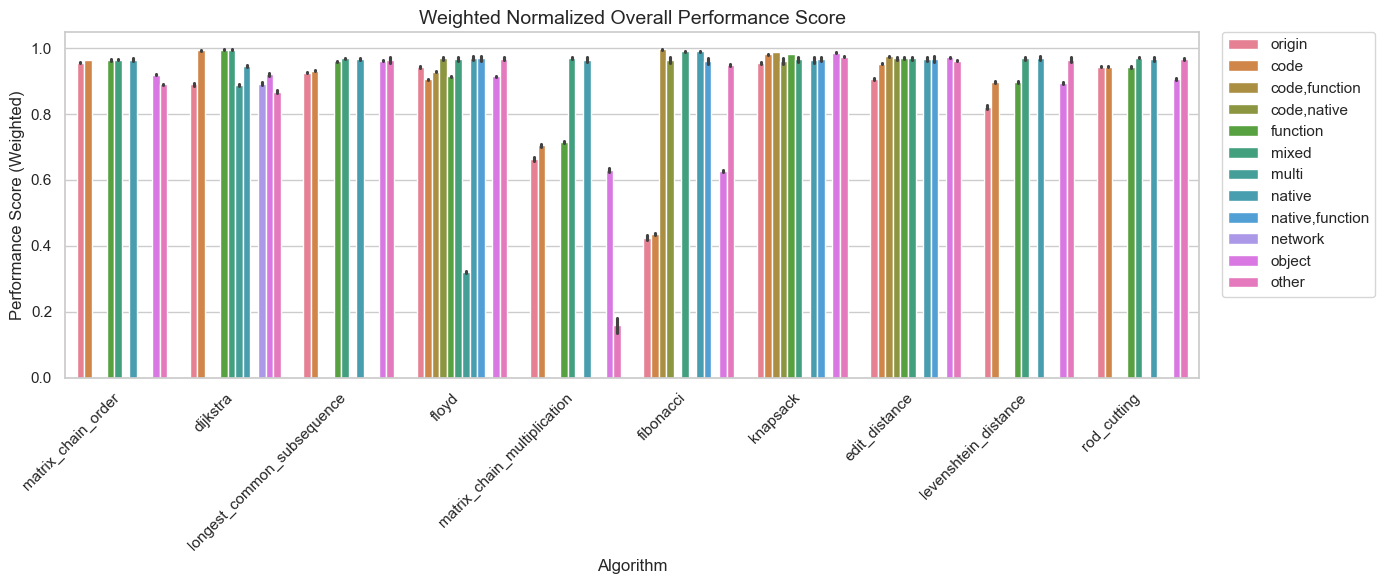

In [75]:
# 归一化
for col in ["execution_time_ms","cpu_usage_percent","memory_usage_mb","cpu_energy_j"]:
    df[col + "_norm"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# 设置权重（CPU usage 比重降低）
w_time = 0.1
w_cpu = 0.1
w_energy = 0.8

df["performance_score"] = 1 - (
    w_time * df["execution_time_ms_norm"] +
    w_cpu  * df["cpu_usage_percent_norm"] +
    w_energy * df["cpu_energy_j_norm"]
)

# 绘图
method_order = ["origin"] + sorted([m for m in df["optimize_method"].unique() if m != "origin"])

plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x="base_algo",
    y="performance_score",
    hue="optimize_method",
    hue_order=method_order,
    ci="sd"
)
plt.title("Weighted Normalized Overall Performance Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Performance Score (Weighted)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()



=== H1: Wilcoxon vs origin (by optimize_method) ===
optimize_method  N_pairs      p_value  rank_biserial_r          r_95%CI
          mixed      100 4.266323e-18         0.998812   [0.998, 0.999]
         native      100 5.112832e-18         0.996436   [0.995, 0.998]
native,function       40 1.818989e-12         1.000000              n/a
       function       90 8.244355e-12         0.829548   [0.752, 0.885]
           code      100 5.246688e-11         0.756040   [0.657, 0.829]
    code,native       40 7.821654e-11         0.975610   [0.954, 0.987]
  code,function       40 1.036697e-07         0.865854   [0.759, 0.927]
          multi       20 8.201599e-05        -0.904762 [-0.962, -0.771]
         object      100 2.437940e-04         0.422574   [0.247, 0.572]
          other      100 6.466205e-03         0.313663   [0.125, 0.480]
        network       10 9.218750e-01        -0.054545              n/a

=== H2: Kruskal–Wallis across algorithms on improvement ===
Kruskal–Wallis H = 430

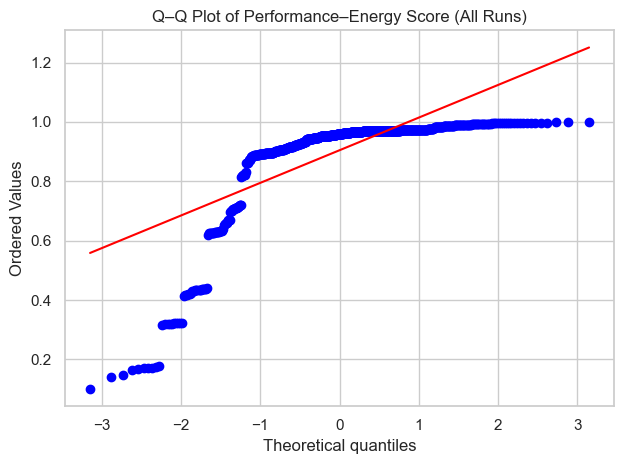

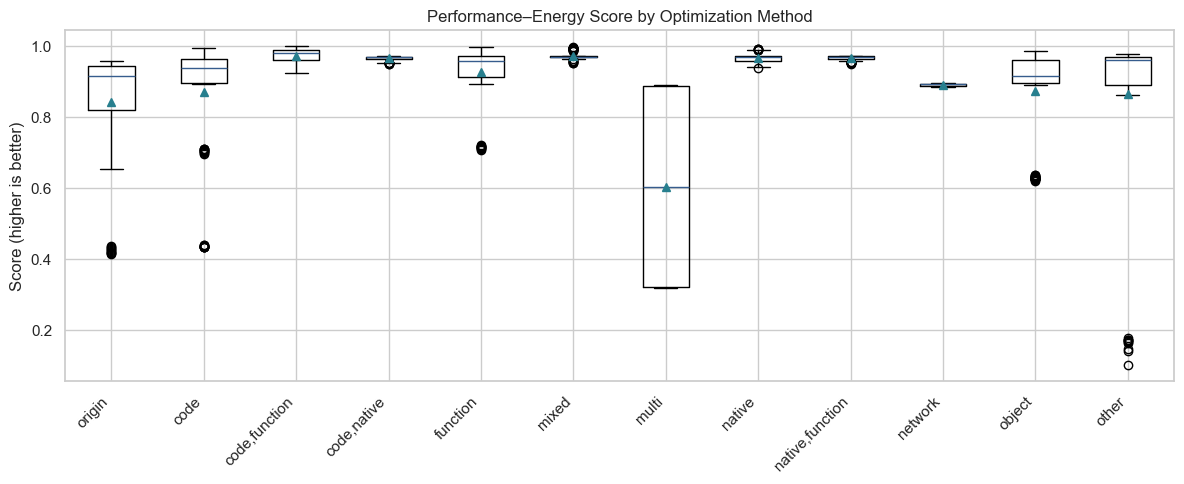

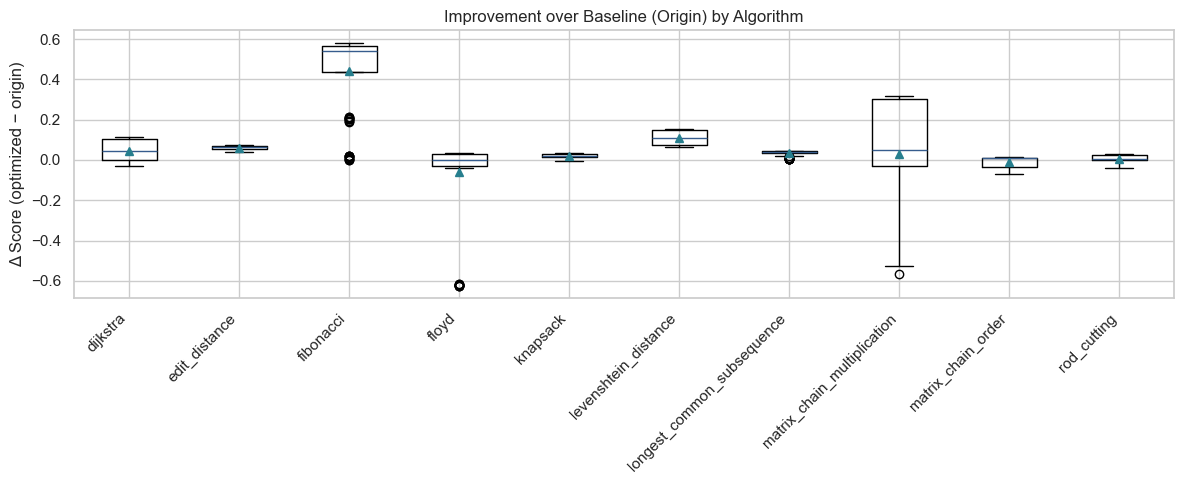

In [76]:
# === Hypothesis Testing & Figures for Performance--Energy Score ===
# Requirements: pandas, numpy, scipy, matplotlib
import os, math, itertools, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings("ignore")

# ------------------------------------------------------------------
# 0) Load data
# ------------------------------------------------------------------
CSV_PATHS = [
    "cleaned_experiment_results.csv",
    "examples/energibridge-profiling/experiments/experiment2.0/all_run_tables_combined.csv"
]

def load_data():
    global df
    if "df" in globals():
        return df.copy()
    for p in CSV_PATHS:
        if os.path.exists(p):
            return pd.read_csv(p)
    raise FileNotFoundError(
        f"DataFrame 'df' not found in memory and none of {CSV_PATHS} exist.\n"
        "Please set CSV_PATHS to your file or define df before running."
    )

df = load_data()

# Basic sanity columns expected:
# - base_algo (algorithm label)
# - optimize_method (e.g., origin, code, function, ...)
# - execution_time_ms, cpu_usage_percent, memory_usage_mb, cpu_energy_j
needed = ["base_algo","optimize_method","execution_time_ms","cpu_usage_percent","memory_usage_mb","cpu_energy_j"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# ------------------------------------------------------------------
# 1) Build Normalized Performance--Energy Score (weights from your text)
# ------------------------------------------------------------------
for col in ["execution_time_ms","cpu_usage_percent","memory_usage_mb","cpu_energy_j"]:
    rng = df[col].max() - df[col].min()
    df[col+"_norm"] = (df[col] - df[col].min()) / (rng if rng != 0 else 1.0)

w_time, w_cpu, w_energy = 0.1, 0.1, 0.8
df["perf_energy_score"] = 1 - (
    w_time   * df["execution_time_ms_norm"] +
    w_cpu    * df["cpu_usage_percent_norm"] +
    w_energy * df["cpu_energy_j_norm"]
)

# ------------------------------------------------------------------
# 2) Helper: build per-(algo, repetition) pairing against 'origin'
# ------------------------------------------------------------------
# Identify a pairing key if repetitions exist; else fall back to index grouping
pair_keys = [c for c in ["base_algo","repetition"] if c in df.columns]
if not pair_keys:
    pair_keys = ["base_algo"]  # best effort

# Compute baseline score per pair (origin)
baseline = (
    df[df["optimize_method"]=="origin"]
    .groupby(pair_keys, as_index=False)["perf_energy_score"].median()
    .rename(columns={"perf_energy_score":"baseline_score"})
)

# Merge to get improvement for all methods relative to origin
df_imp = df.merge(baseline, on=pair_keys, how="inner")
df_imp["improvement"] = df_imp["perf_energy_score"] - df_imp["baseline_score"]

# ------------------------------------------------------------------
# 3) Figures (one chart per figure; matplotlib only; default colors)
# ------------------------------------------------------------------
os.makedirs("figures", exist_ok=True)

# Fig A: Normality (Q–Q plot) for overall score
plt.figure()
stats.probplot(df["perf_energy_score"].dropna(), dist="norm", plot=plt)
plt.title("Q–Q Plot of Performance–Energy Score (All Runs)")
plt.tight_layout()
plt.savefig("figures/qqplot_perf_energy_score.png", dpi=200)

# Fig B: Boxplot by optimization method (scores)
order_methods = sorted(df["optimize_method"].unique(), key=lambda x: (x!="origin", x))
plt.figure(figsize=(12,5))
data_by_method = [df.loc[df["optimize_method"]==m, "perf_energy_score"].dropna() for m in order_methods]
plt.boxplot(data_by_method, labels=order_methods, showmeans=True)
plt.title("Performance–Energy Score by Optimization Method")
plt.ylabel("Score (higher is better)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("figures/boxplot_by_method_score.png", dpi=200)

# Fig C: Boxplot of improvements vs origin, by algorithm
algos = sorted(df_imp["base_algo"].unique())
plt.figure(figsize=(12,5))
data_by_algo = [df_imp.loc[(df_imp["base_algo"]==a) & (df_imp["optimize_method"]!="origin"), "improvement"].dropna() for a in algos]
plt.boxplot(data_by_algo, labels=algos, showmeans=True)
plt.title("Improvement over Baseline (Origin) by Algorithm")
plt.ylabel("Δ Score (optimized − origin)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("figures/boxplot_improvement_by_algo.png", dpi=200)

# ------------------------------------------------------------------
# 4) Statistical tests
# ------------------------------------------------------------------

# 4.1 H1: For each optimize_method != origin, Wilcoxon signed-rank vs origin (paired on pair_keys)
def wilcoxon_signed_rank_with_rbc(x, y):
    """
    x, y must be paired arrays (same length); computes:
    - Wilcoxon signed-rank test (two-sided)
    - rank-biserial correlation (effect size) and approx CI via normal approx
    """
    # Remove NaNs and zero-differences for Wilcoxon
    diffs = x - y
    mask = ~np.isnan(diffs) & (diffs != 0)
    diffs = diffs[mask]
    if len(diffs) == 0:
        return np.nan, np.nan, (np.nan, np.nan), 0

    res = stats.wilcoxon(diffs, alternative="two-sided", zero_method="wilcox")
    W = res.statistic
    n = len(diffs)

    # Rank-biserial correlation for paired samples:
    # r_rb = 1 - (2 * W) / (n*(n+1)/2)  when W is the sum of signed ranks for negative diffs
    # scipy returns W = min(W+, W-). To get r with sign, use sign of median(diffs).
    # Use convention: positive r means x > y (improvement).
    T = n*(n+1)/2
    r_abs = 1 - (2*W)/T
    sign = np.sign(np.median(diffs)) if np.median(diffs)!=0 else 0
    r_rb = r_abs * sign

    # Approx 95% CI using Fisher z on r (rough, but informative)
    if n > 10 and abs(r_rb) < 0.999:
        z = 0.5*np.log((1+r_rb)/(1-r_rb))
        se = 1/math.sqrt(n-3)
        z_low, z_high = z - 1.96*se, z + 1.96*se
        r_low, r_high = (np.tanh(z_low), np.tanh(z_high))
    else:
        r_low, r_high = (np.nan, np.nan)

    return res.pvalue, r_rb, (r_low, r_high), n

h1_rows = []
for m in order_methods:
    if m == "origin":
        continue
    # pair by pair_keys inside each algorithm to be strict (paired design)
    pairs = []
    for key_vals, grp in df_imp[df_imp["optimize_method"].isin(["origin", m])].groupby(pair_keys):
        if set(grp["optimize_method"]) == {"origin", m}:
            x = grp.loc[grp["optimize_method"]==m, "perf_energy_score"].values
            y = grp.loc[grp["optimize_method"]=="origin", "perf_energy_score"].values
            # if multiple per pair (rare), take median to keep pairing 1-1
            pairs.append((np.median(x), np.median(y)))
    if len(pairs) < 3:
        h1_rows.append([m, np.nan, np.nan, np.nan, np.nan])
        continue
    x = np.array([p[0] for p in pairs])
    y = np.array([p[1] for p in pairs])
    p, r_rb, ci, n = wilcoxon_signed_rank_with_rbc(x, y)
    h1_rows.append([m, n, p, r_rb, f"[{ci[0]:.3f}, {ci[1]:.3f}]" if not np.isnan(ci[0]) else "n/a"])

h1_table = pd.DataFrame(h1_rows, columns=["optimize_method","N_pairs","p_value","rank_biserial_r","r_95%CI"])
h1_table.sort_values("p_value", inplace=True)

# 4.2 H2: Does optimization effectiveness depend on algorithm?
# Measure = improvement (optimized − origin); exclude origin rows
improve = df_imp[df_imp["optimize_method"]!="origin"].copy()

# Kruskal–Wallis across algorithms
groups = [improve.loc[improve["base_algo"]==a, "improvement"].dropna().values for a in algos if len(improve.loc[improve["base_algo"]==a, "improvement"].dropna())>0]
kw_stat, kw_p = stats.kruskal(*groups)

# Post-hoc: pairwise Mann–Whitney with Holm correction
pairs = list(itertools.combinations(algos, 2))
pvals = []
for a,b in pairs:
    x = improve.loc[improve["base_algo"]==a, "improvement"].dropna().values
    y = improve.loc[improve["base_algo"]==b, "improvement"].dropna().values
    if len(x)>0 and len(y)>0:
        pvals.append(stats.mannwhitneyu(x, y, alternative="two-sided").pvalue)
    else:
        pvals.append(np.nan)

# Holm step-down
def holm_correction(p_list):
    idx = np.argsort(p_list)
    m = len(p_list)
    adj = [np.nan]*m
    prev = 0
    for k, i in enumerate(idx):
        if np.isnan(p_list[i]):
            adj[i] = np.nan
            continue
        adj_p = (m-k)*p_list[i]
        adj_p = max(adj_p, prev)
        prev = adj_p
        adj[i] = min(adj_p, 1.0)
    return adj

adj_pvals = holm_correction(pvals)
posthoc = pd.DataFrame({
    "algo_A":[a for a,b in pairs],
    "algo_B":[b for a,b in pairs],
    "p_value":pvals,
    "p_value_holm":adj_pvals
}).sort_values("p_value_holm")

# ------------------------------------------------------------------
# 5) Table X: Grouped stats + H1 results (export)
# ------------------------------------------------------------------
summary = (
    df.groupby("optimize_method")["perf_energy_score"]
    .agg(["count","mean","median","std"])
    .rename(columns={"count":"N"})
    .reset_index()
)

table_X = summary.merge(h1_table, on="optimize_method", how="left")
table_X.to_csv("Table_X_performance_energy_hypothesis_results.csv", index=False)

# Show quick previews in console
print("\n=== H1: Wilcoxon vs origin (by optimize_method) ===")
print(h1_table.to_string(index=False))

print("\n=== H2: Kruskal–Wallis across algorithms on improvement ===")
print(f"Kruskal–Wallis H = {kw_stat:.3f}, p = {kw_p:.4g}")

print("\n=== H2 Post-hoc (Mann–Whitney, Holm-corrected) ===")
print(posthoc.head(15).to_string(index=False))

print("\nSaved:")
print(" - figures/qqplot_perf_energy_score.png")
print(" - figures/boxplot_by_method_score.png")
print(" - figures/boxplot_improvement_by_algo.png")
print(" - Table_X_performance_energy_hypothesis_results.csv")
